# Project Python Foundations: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/PythonForDataScience/foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Order_id, customer_id, food_preparation_time
and delivery_time have int64 data type(numerical),
• Where restaurant_name, cuisine_type, day_of_the_week, rating have object data type(categorical).
• Cost_of_the_order has float64 data type(numerical).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isna().sum() #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There is no missing data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the summary statistics of the numerical data
df.describe().T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


The minimum time to prepare the food is 20 minutes, and the maximum time to prepare the food is 35 minutes. The average food preparation is 27 minutes once the order is placed.
•The minimum delivery time is 15 minutes, the maximum delivery time is 33 minutes, average delivery time is 25 minutes. (does not specify where it is on weekends or weekdays)
•The minimum cost of the order is $4.47, #maximum cost of the order is $35.41, and the average cost of the order is around $16.5.

### **Question 5:** How many orders are not rated?

In [ ]:
df['rating'].value_counts() ## Complete the code

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Out of 1898 there are 736 orders are not rated/38.8%
• 588 orders received 5 out of 5 which gives 31%
• 386 orders received 4 out of 5 which gives 20.3%
• 188 orders received 3 out of 5which gives 9.9%

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

#### Order ID

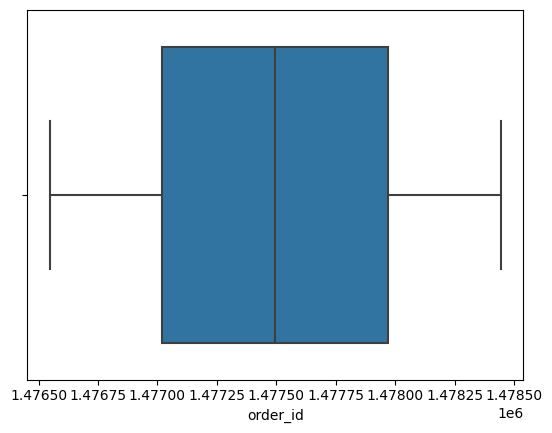

In [74]:
# check unique order ID
df['order_id'].nunique()
sns.boxplot(data=df,x='order_id');
plt.show()

There are 1898 unique numbers of order ID and the box plot shows that the data is distributed normally with no outliers.

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [73]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].unique() ## Complete the code to find out  number of  unique cuisine type

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

<Axes: xlabel='cuisine_type', ylabel='count'>

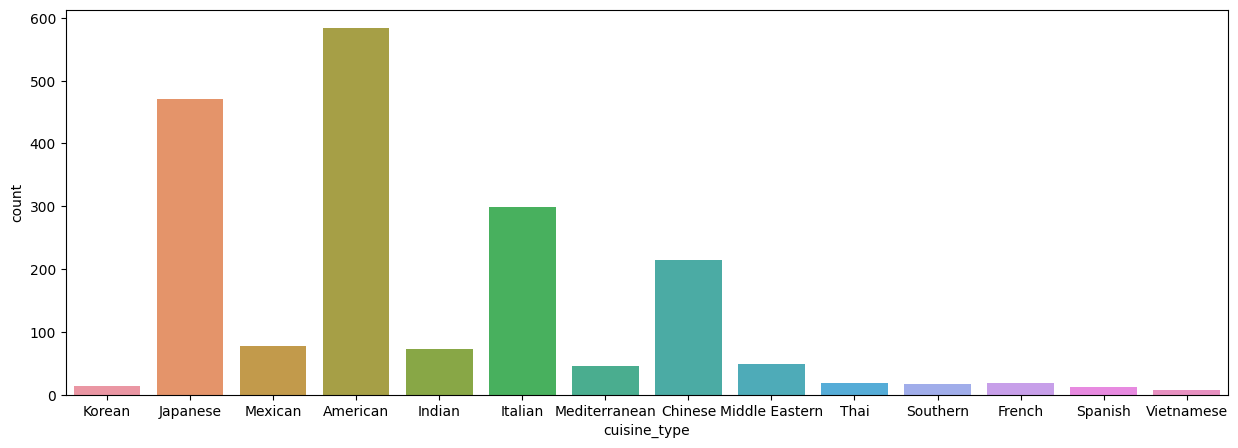

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

There are 14 unique cuisine type.The most popular are American, Japanese, Italian, Chinese. The least popular is Vietnamese, Spanish,Korean,French,Southern and Thai.

#### Cost of the order

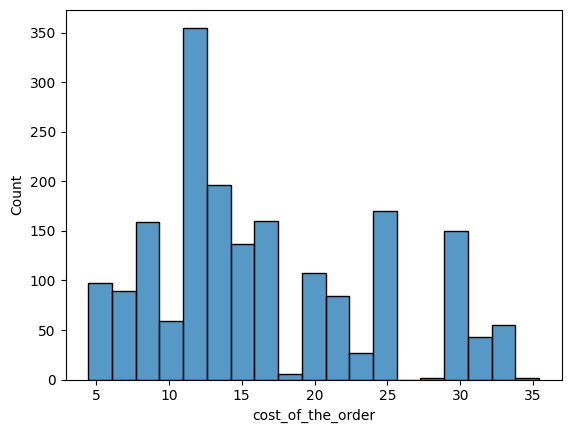

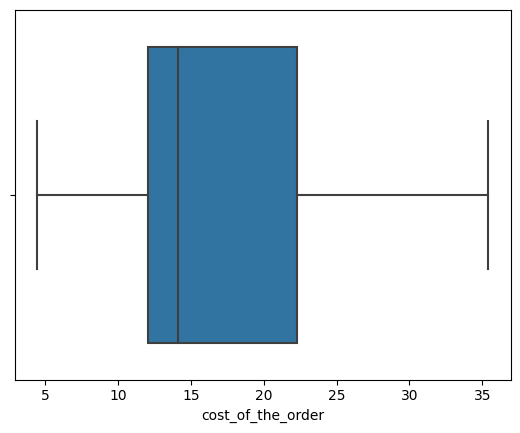

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

• The cost of the order distribution is right-skewed with no outliers.
• 50% of orders lays less than 14$.

• 75% of orders lays under 23$

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

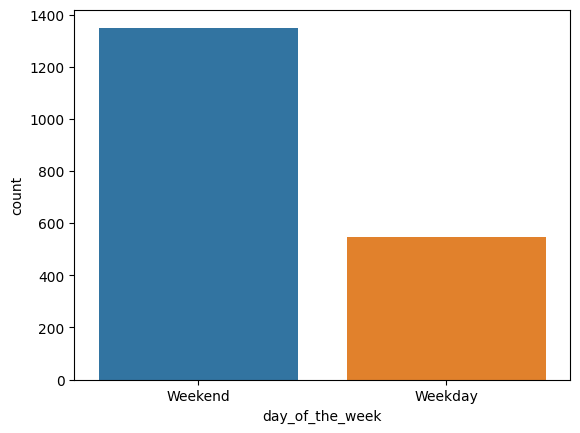

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

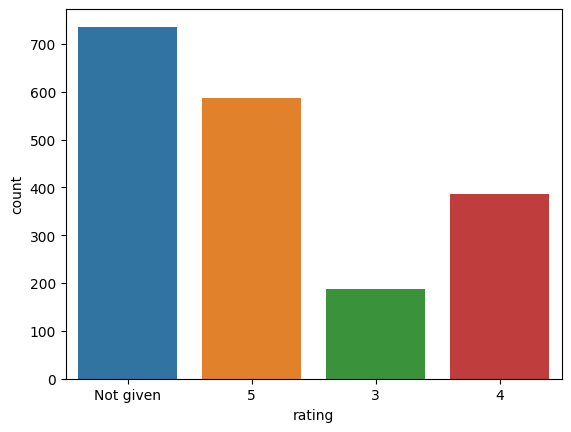

In [ ]:
sns.countplot(data = df, x = 'rating'); ## Complete the code to plot bar graph for 'rating' column

• The majority of orders are placed on the weekends (71.2%) rather on weekdays(28.8%).
• The rating of the food: not given are 38.8%, the waiting of 5 out of 5=31% of orders. The
rating of 4 out of 5 were given 20.3% and the least rating of 3 out of 5=9.9%.

#### Food Preparation time

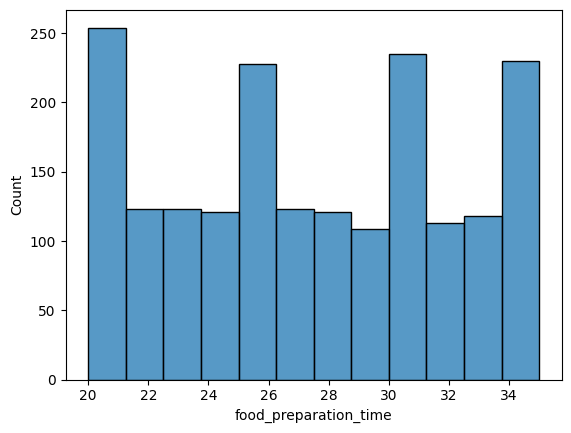

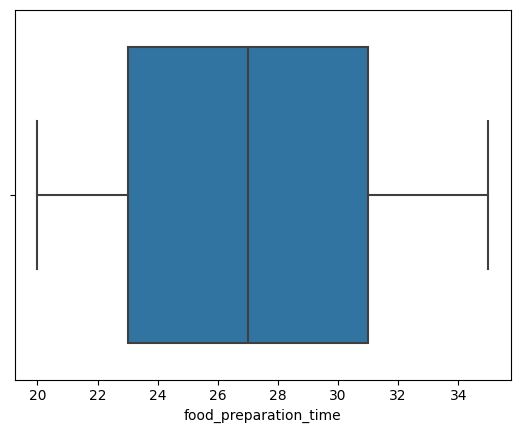

In [75]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

• The food preparation time is normally distributed with no outliers.
• The 50% of time lays 27 minutes, the 75% of time lays 31 minutes.


#### Delivery time

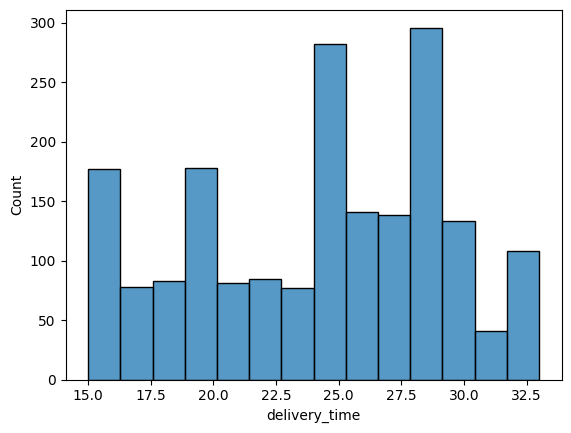

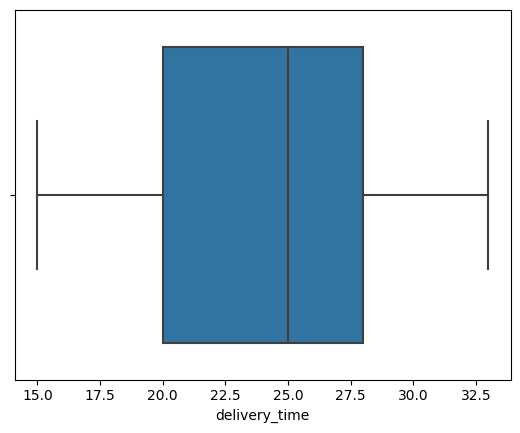

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

The mean delivery time for this dataset is 24.16 minutes. The minimum delivery time is 15 minutes. 75% of delivery time lays at 28 minutes. Most of deliveries indicated between 24-26 minutes and 28-29 minutes.


### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8:** Which is the most popular cuisine on weekends?

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

•The most popular restaurant is Shake Shack with the most number of orders received: 219. Followed by The Meatball Shop (132 orders). Third place goes to Blue Ribbon Sushi(119 orders). The following fourth place is taking Blue Ribbon Fried Chicken(96), and the last place is Parm(68 orders).
•The most popular cuisine on the weekends is American with orders 415, following Japanese cuisine (335), Italian cuisine (207), Chinese (163), and the last is Mexican(53).

### **Question 9:** What percentage of the orders cost more than 20 dollars?


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time?

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean() ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset.

#### Cuisine vs Cost of the order

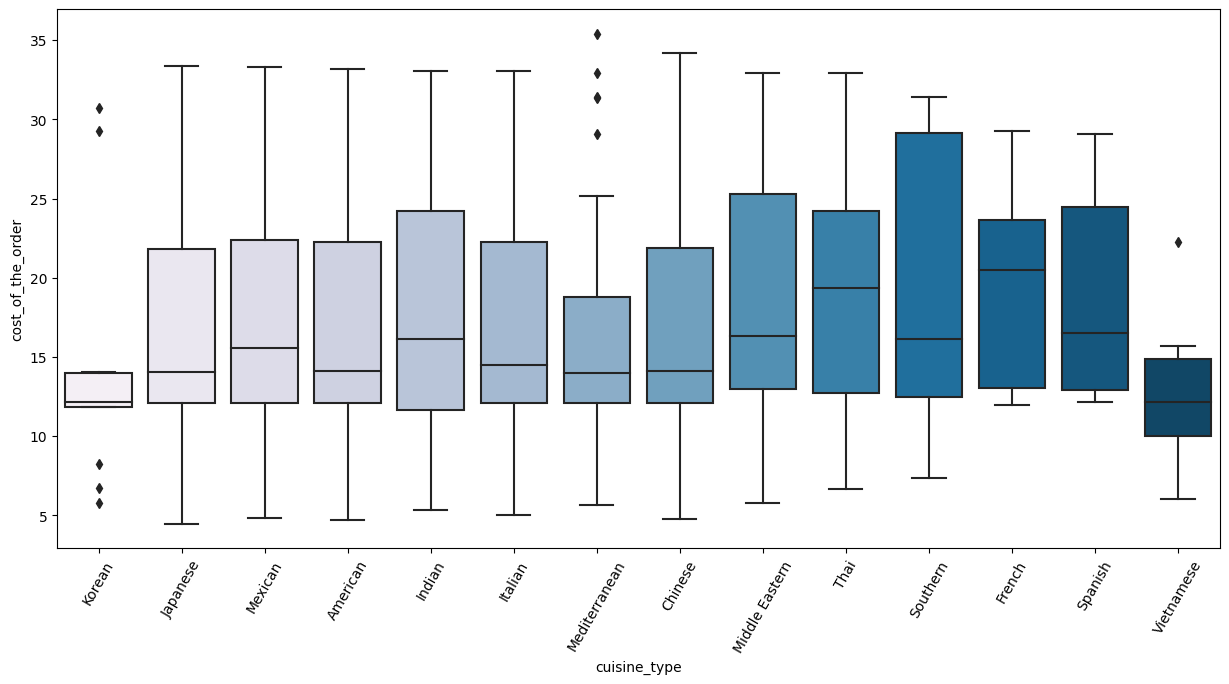

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

There is a clear difference between the type of cuisine and the cost of the order. Korean cuisine has outliers which indicate that some of its dishes can be very expensive or very cheap.
Japanese, Mexican, America, and Chinese cuisine types can vary in the same price category.
Mediterranean cuisine has outliers which indicate some of its dishes can be more expensive.
Vietnamese cuisine has an outlier which also indicates the most expensive dish in their cuisine.
According to the box plot can observe that most of the cuisines provide cheap dishes priced between 4$-10$. Excluding French and Spanish cuisines, the prices start from 12$.

#### Cuisine vs Food Preparation time

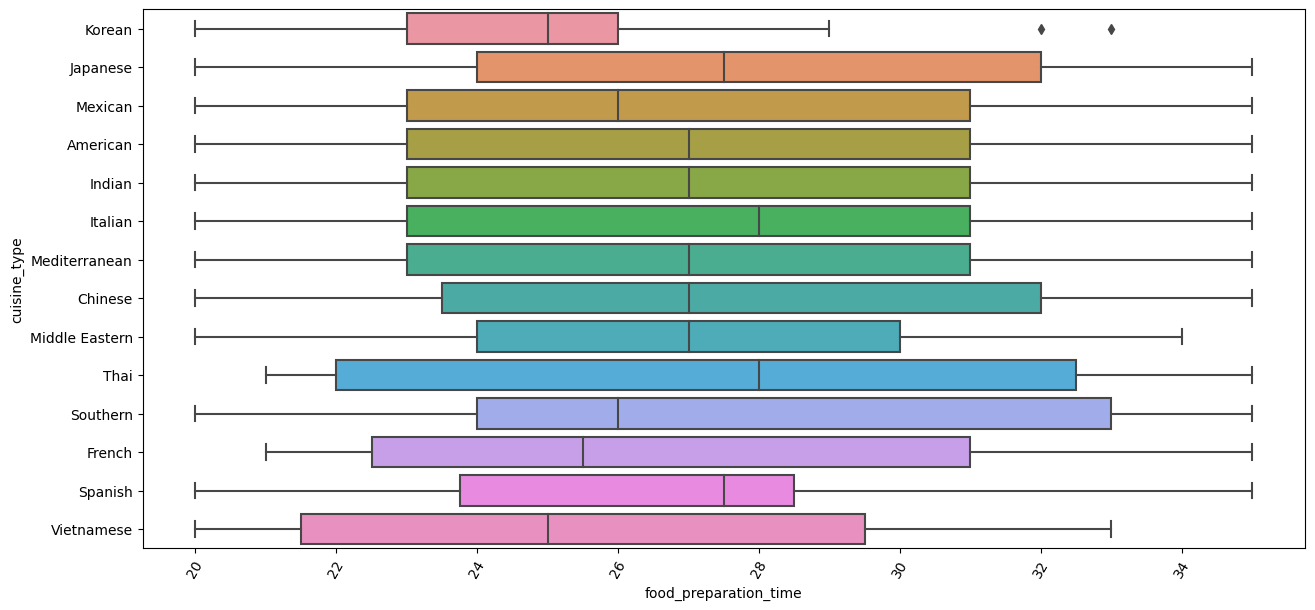

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='food_preparation_time',y='cuisine_type')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

The box plot shows the cuisine type and food preparation time. As we can see the average food preparation time between American, Indian, Mediterranean, Chinese, and Middle Eastern is same 27 minutes.
Korean cuisine has outliers which indicate some of the dishes need more time to prepare.
The minimum time of food preparation in Korean, Japanese, Mexican, American, Indian, Italian, Mediterranean, Chinese, Middle Eastern, Southern, Spanish, and Vietnamese is 20 minutes.
The maximum time for the Japanese, Mexican, American, Indian, Italian, Mediterranean, Chines, Thai, Southern,French, and Spanish is 35 minutes.

#### Day of the Week vs Delivery time

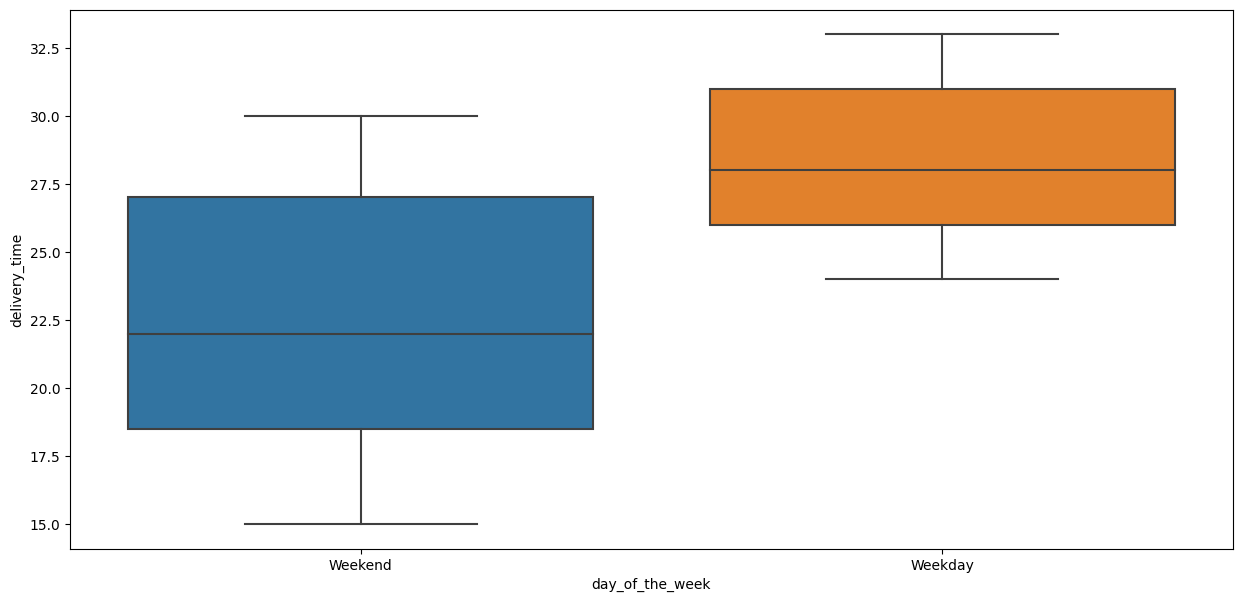

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

There is a clear difference between the delivery time on weekdays and weekends.
50% of the delivery time during weekends is less compared to 50% of the delivery time during weekdays.
Moreover, 75% of delivery were faster during weekends compared to 50% of delivery during weekdays.
There is a huge gap between minimum-time delivery during weekends and minimum-time delivery during weekdays.
This may occur during weekend there is no traffic.

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Rating vs Delivery time

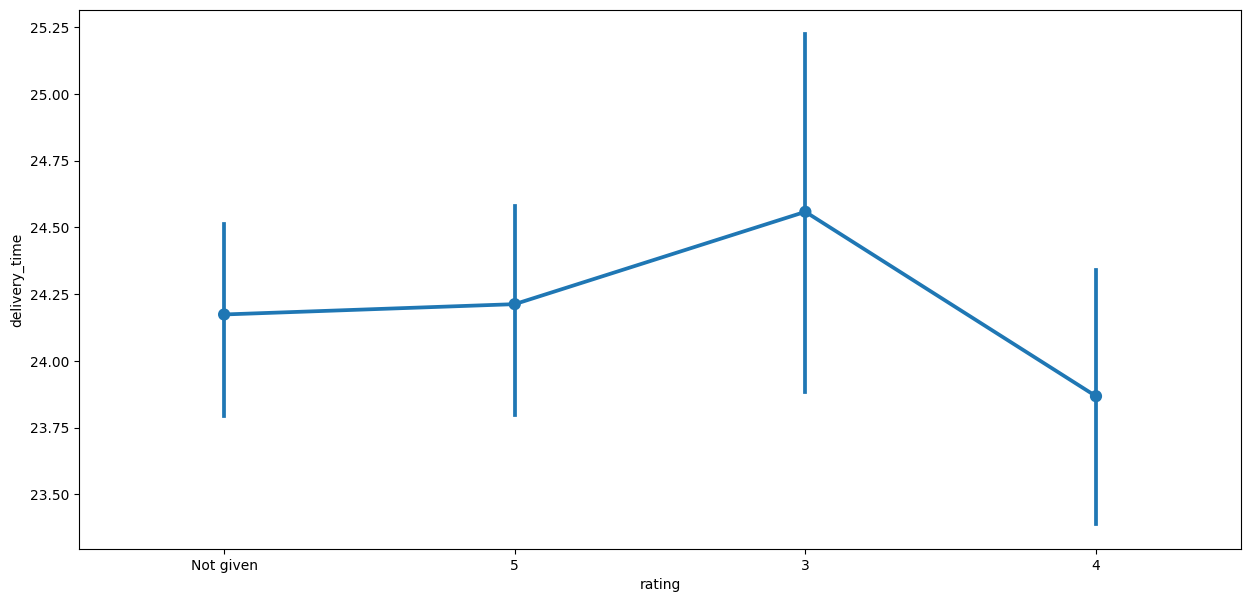

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

The mean between rating and delivery time is the highest of rating ‘3’. The lowest mean is rating ‘4’. The mean of rating ‘5’ slightly higher compare to rating ‘not given’. The lowest mean is rating ‘4’.

#### Rating vs Food preparation time

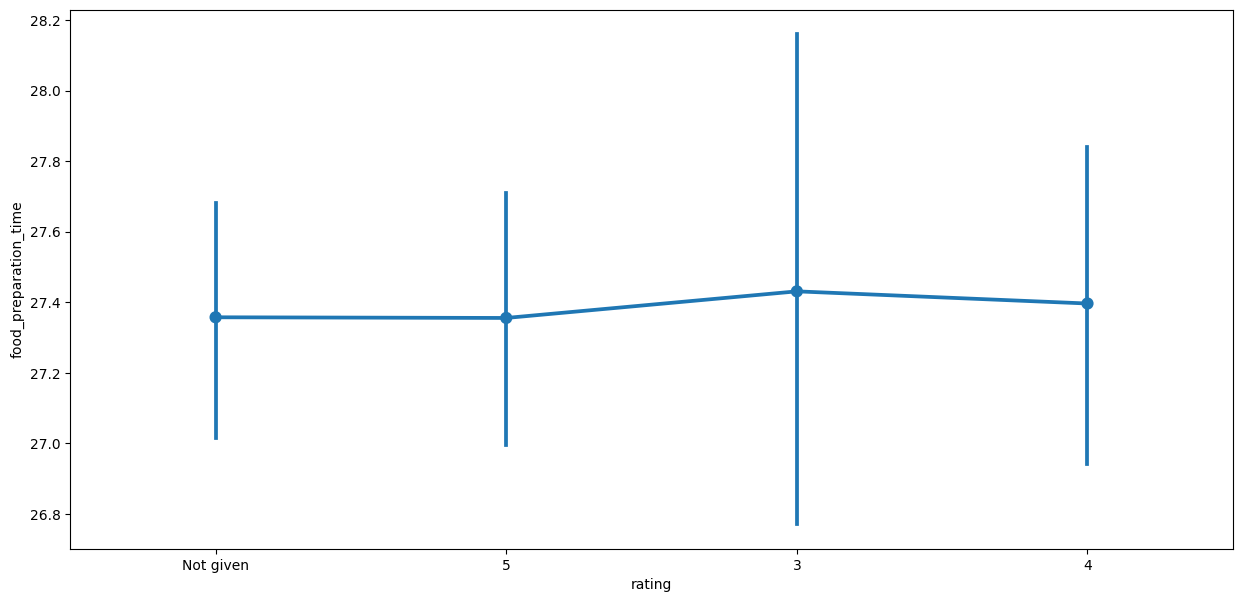

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='food_preparation_time')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

The mean between food preparation and rating are not very different. It lays at 27.4 minutes. The mean of the rating ‘3’ is slightly higher (27.5 minutes) compare to rating ‘5’, ‘4’ and ‘not given’.

#### Rating vs Cost of the order

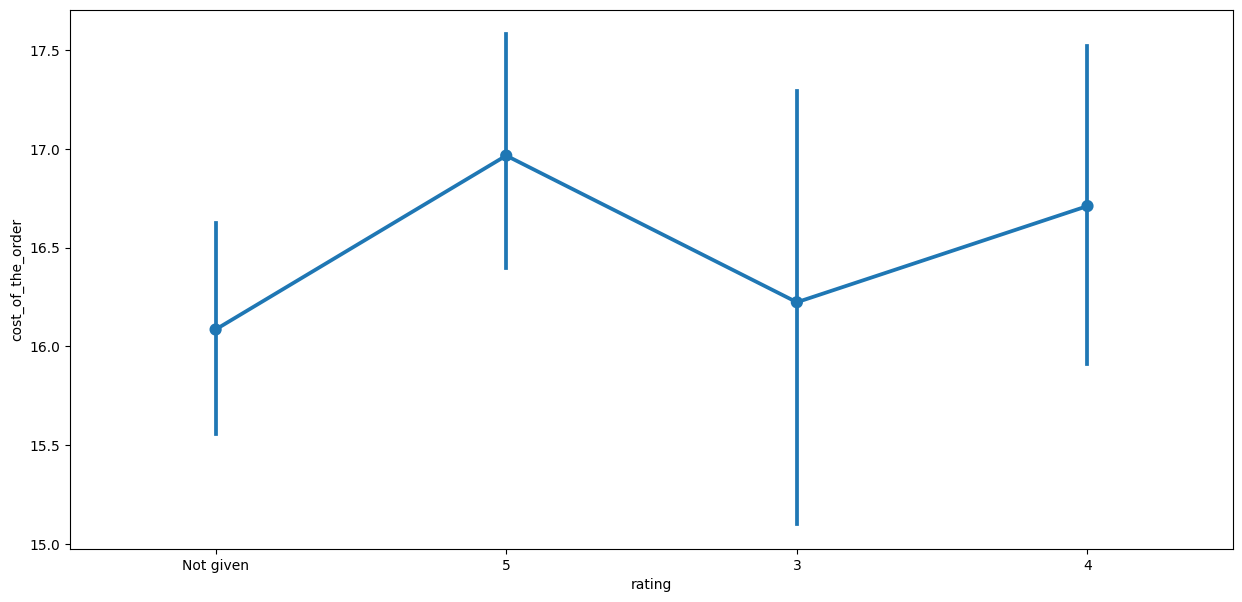

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

The mean of rating ‘5’ is $17 and it is the highest mean rating compared to 3 , 4, and not given. We can say that the highest rated food can get expensive.

#### Correlation among variables

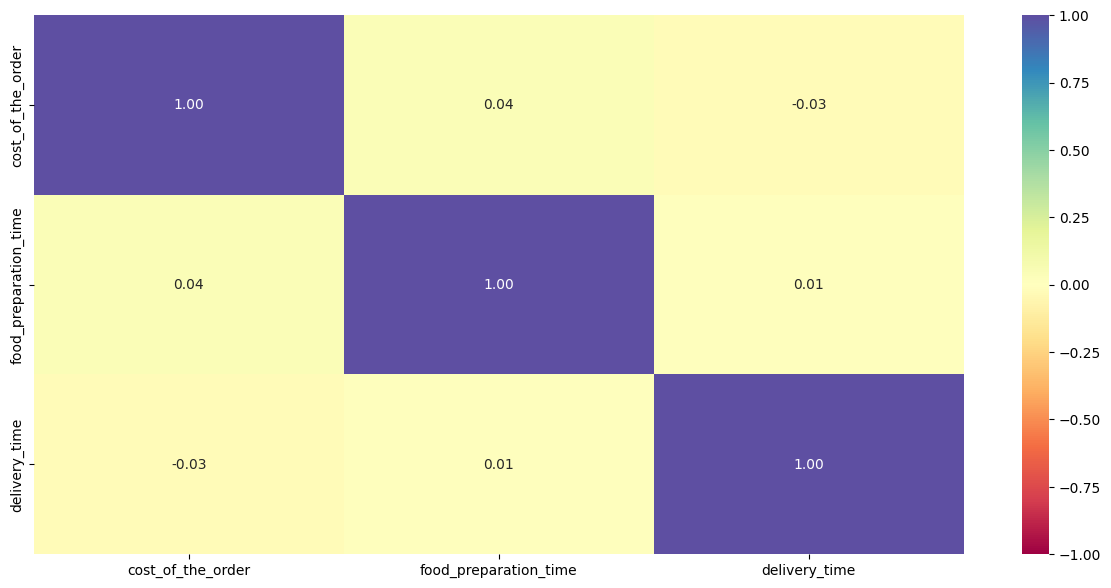

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The heat map shows that there is weak correlation between cost of the orders, food time preparation, and delivery time. The correlation is negatively weak between delivery time and cost of the orders.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


The restaurants such as Shake Shack (133 ratings), The meatball Shop(84 ratings), Blue Ribbon Sushi(73 ratings), and Blue Ribbon Fried Chicken(64 ratings) have ratings more than 50 with an average rating greater than 4. The company can provide a promotional offer in advertisement for mentioned restaurants.

In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
percentage_of_orders=df['total_time'].count()
percentage_more60=df['total_time'][df['total_time']>60].count()
percentage_more60=round((percentage_more60/percentage_of_orders)*100,2)
percentage_more60




10.54

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


### Conclusion and Recommendations

•We analyze the FoodHub data set, which offers access to multiple restaurants through a single smartphone app in New York. It provides them with good food from their favorite restaurants. The data contained 1898 rows and 9 columns. The main feature of interest is that FoodHub company wants to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.
•The orders from the restaurants range from $4.47 to $35.41, while the average cost is around $16.49. Half of the cost of the orders is $14.14 which indicated that most of the orders are not very costly. The number of total orders that cost above 20 dollars is 555. Percentage of orders above 20 dollars: 29.24 %
•Food preparation time varies from 20 minutes to 35 minutes. The average time for food preparation takes around 27 minutes.
•Delivery time varies from 15 minutes to 33 minutes. The average food delivery time is 24 minutes. The most popular cuisines are American, Japanese, Italian, and Chinese.
•The majority of orders are placed during weekends rather than during weekdays, probably because during weekends, delivering food is faster due to there not being very heavy traffic compared to weekdays. The minimum time to deliver food during weekends is 15 minutes compared time 25 minutes on weekdays. Also, it seems people are reluctant to cook during weekends.
•When the customers receive the food they can rate it. The majority of the customers did not rate the food at 38%. However, if we put aside the ‘not given’ rating and leave only those who rated the food, we can conclude that most of the customers rated with ‘5’ and ‘4’, which means the food is delicious with high quality.
•Only 9.9% of customers rated food with ‘3’.
•There are the top 5 restaurants that have the most orders: Shake Shack has the most number of orders received with 219 followed by The Meatball Shop (132 orders). The third place goes to Blue Ribbon Sushi(119 orders).
There are no relationships between the cost of the orders, food time preparation, and delivery time. The correlation is negatively weak between delivery time and cost of the orders.

Conclusion and recommendation.
•Online food delivery is a great option for people living a hectic life.
•The most demand online food comes during the weekends with a reasonable delivery time. •Some customers use the app frequently and place a lot of orders, and to enhance
customer experience the company should consider benefitting the customers with a
20% discount voucher.
•If the FoodHub wants to provide a promotional offer in the advertisement of the restaurant
they should focus on the restaurants with the most demand, which are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, with the average rating more than 4. These restaurants also have the most generated revenue from the orders which eventually provide the revenue for the FoodHub.

The most popular cuisines are American, Japanese, Italian, and Chinese with the highest rating of ‘5’ and ‘4’ which can be concluded that the food quality is high. Also, 75% of the dishes vary between $22-$23, and food preparation time varies between 31-32 minutes. The company should promote the most popular cuisine as it will be reflected on its revenue.



---